<img src = "https://images2.imgbox.com/a5/72/7ZbDUHlf_o.jpg" width="200">

###  Processamento de dados:
---
- Criar uma tabela com todos os MQLs, com todas as informações disponíveis para cada um.
- Criar uma coluna com quais MQLs fecharam acordo e quais foram perdidos.

### Perguntas a serem respondidas:
---
- Qual foi a taxa de conversão total?
- Qual foi a taxa de conversão de cada origem?
- Qual foi a taxa de conversão de cada página inicial?
- Para cada SR, qual a receita média declarada dos leads?
- Para cada SR, quantos de cada business_type a pessoa converteu?
- Para cada SR, quantos de cada lead_behaviour_profile a pessoa converteu?
- Para cada SR, quantos de cada lead_type a pessoa converteu?

### Extra:
---

Caso consiga resolver as questões acima com facilidade, aproveite a base "irmã" dessa para fazer outras explorações que você ache interessante!

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

**Lembre de separar novamente em 2 etapas:**
1. Processamento dos dados, para criar uma tabela "analítica".
2. Análise exploratória dos dados.

---

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def relatorio_de_nulos(data):
    quantidade_de_nulos = data.isnull().sum()
    percentual_de_nulos = (data.isnull().mean() * 100).round(3)
    nulos_df = pd.DataFrame({'Nulos': quantidade_de_nulos,
                             'Nulos(%)': percentual_de_nulos})
    nulos_df.sort_values(['Nulos(%)'], ascending=[False], inplace=True)
    nulos_df.head(len(nulos_df))
    return nulos_df

def mapa_de_valores_nulos(data):
    plt.figure(figsize=(10,15))
    ax = sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    ax.set_title('Mapa de valores Nulos')
    ax.set_ylabel('Indice Registro')
    ax.set_xlabel('Campo')
    plt.show()

In [3]:
# Carregando dados 
mkt_leads_df    = pd.read_csv('data\olist_marketing_qualified_leads_dataset.csv')
closed_deals_df = pd.read_csv('data\olist_closed_deals_dataset.csv')

# configurando valor máximo de observações para 200
pd.set_option('display.max_rows', 200)

In [4]:
# primeiras observações do dataframe de marketing lead
mkt_leads_df.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [5]:
# primeiras observações do dataframe de acordos firmados
closed_deals_df.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [6]:
# Combinando os dataframes
mqls = pd.merge(mkt_leads_df, closed_deals_df, on='mql_id', how='left')

# primeiras observações do novo dataframe
mqls.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0


In [7]:
relatorio_de_nulos(mqls)

,Nulos,Nulos(%)
has_company,7937,99.212
has_gtin,7936,99.200
average_stock,7934,99.175
declared_product_catalog_size,7931,99.138
lead_behaviour_profile,7335,91.688
business_type,7168,89.600
lead_type,7164,89.550
business_segment,7159,89.488
declared_monthly_revenue,7158,89.475
won_date,7158,89.475


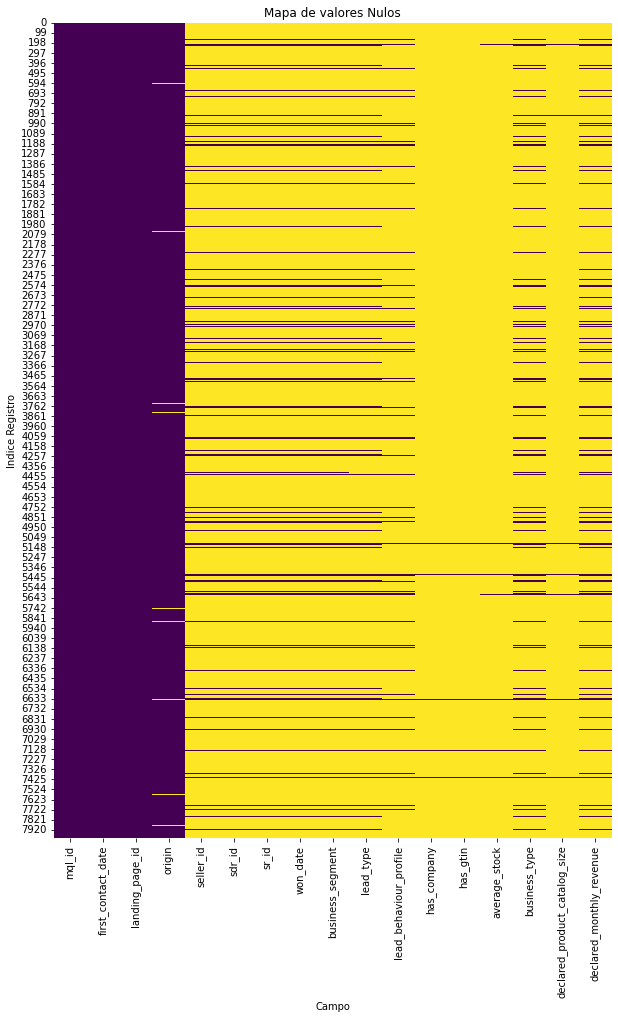

In [8]:
mapa_de_valores_nulos(mqls)

In [9]:
mqls.origin.fillna('unknown', inplace=True)

In [10]:
mqls.origin.unique()

array(['social', 'paid_search', 'organic_search', 'email', 'unknown',
       'referral', 'direct_traffic', 'display', 'other_publicities',
       'other'], dtype=object)

In [11]:
# Preenchendo valores nulos
mqls.replace(np.nan, 0, inplace=True)

# Criando a variável closed_deal, que identifica se o acordo foi firmado, ou não
mqls['closed_deal'] = np.where(mqls.seller_id != 0, 1, 0)

# primeiras observações do dataframe
mqls.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,closed_deal
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,0,0,0,reseller,0.0,0.0,1


In [12]:
# Excluindo observações de acordos não firmados
mqls_closed = mqls.drop(mqls[mqls['closed_deal'] == 0].index)

# 10 primeiras observações do dataframe 
mqls_closed.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,closed_deal
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,0,0,0,reseller,0.0,0.0,1
12,a555fb36b9368110ede0f043dfc3b9a0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,0,0,0,reseller,0.0,0.0,1
14,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,0,0,0,reseller,0.0,0.0,1
39,f5fee8f7da74f4887f5bcae2bafb6dd6,2018-01-14,22c29808c4f815213303f8933030604c,paid_search,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,0,0,0,0,reseller,0.0,0.0,1
67,ffe640179b554e295c167a2f6be528e0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,0,0,0,manufacturer,0.0,0.0,1


---
## Qual foi a taxa de conversão total?

In [13]:
mqls.closed_deal.value_counts(normalize=True)*100

0    89.475
1    10.525
Name: closed_deal, dtype: float64

---
## Qual foi a taxa de conversão de cada origem?

In [14]:
mqls.groupby('origin')['closed_deal'].value_counts(normalize=True)*100

origin             closed_deal
direct_traffic     0              88.777555
                   1              11.222445
display            0              94.915254
                   1               5.084746
email              0              96.957404
                   1               3.042596
organic_search     0              88.196864
                   1              11.803136
other              0              97.333333
                   1               2.666667
other_publicities  0              95.384615
                   1               4.615385
paid_search        0              87.704918
                   1              12.295082
referral           0              91.549296
                   1               8.450704
social             0              94.444444
                   1               5.555556
unknown            0              83.347714
                   1              16.652286
Name: closed_deal, dtype: float64

In [15]:
mqls_closed.groupby('origin')['closed_deal'].value_counts().transform(lambda x: round(x/x.sum()*100, 2))

origin             closed_deal
direct_traffic     1               6.65
display            1               0.71
email              1               1.78
organic_search     1              32.19
other              1               0.48
other_publicities  1               0.36
paid_search        1              23.16
referral           1               2.85
social             1               8.91
unknown            1              22.92
Name: closed_deal, dtype: float64

---
## Qual foi a taxa de conversão de cada página inicial?

In [16]:
mqls_closed.groupby('landing_page_id')['closed_deal'].value_counts().transform(lambda x: round(x/x.sum()*100, 2))

landing_page_id                   closed_deal
007f9098284a86ee80ddeb25d53e0af8  1               0.48
0218f6be0b76aca72ab4d00ee9e8cf10  1               0.71
04a75b75d5f4f3a16b0178fbe382da00  1               0.12
0625ca637bf063abf254a66fe91fa84b  1               0.12
090ffa1062e6dde353c36524563acefc  1               0.12
0b353d6bc27566f1d238313c33d95f56  1               0.12
0b9430edcbf2d9a95148c806af2b6699  1               0.24
0d6bc3c00e4e64927cae2e8d9c6a0b9b  1               0.12
0e5a178e3cd2368607f3e72f46140476  1               0.12
0f7f8ed9a1db8fc2a42e273972db10d4  1               0.24
10f5ac17ed7d6ee9a7d737ac1d2fcb32  1               0.12
13fa6688e41e863dcbfdb4c6112c4c86  1               0.12
146e076b71a6ca8c31b34191182a313a  1               0.12
15cf89bab2c3163b4f9d8601d108f8b2  1               0.12
1722481ac9e5371e5099dea226b5421d  1               0.24
1baca9df5850e5ba75545d8b2eb8d966  1               0.24
1ceb590cd1e00c7ee95220971f82693d  1               1.07
1d4ddc25ccaa2adeded

---
## Para cada SR, qual a receita média declarada dos leads?

In [17]:
mqls_closed.groupby('sr_id')['declared_monthly_revenue'].mean().round(2).to_frame()

,declared_monthly_revenue
sr_id,
060c0a26f19f4d66b42e0d8796688490,0.00
068066e24f0c643eb1d089c7dd20cd73,7037.04
0a0fb2b07d841f84fb6714e35c723075,6000.00
2695de1affa7750089c0455f8ce27021,1694.92
34d40cdaf94010a1d05b0d6212f9e909,19000.00
495d4e95a8cf8bbf8b432b612a2aa328,6666.67
4b339f9567d060bcea4f5136b9f5949e,27777.78
4ef15afb4b2723d8f3d81e51ec7afefe,377293.23
56bf83c4bb35763a51c2baab501b4c67,12500.00


---
## Para cada SR, quantos de cada business_type a pessoa converteu?

In [18]:
mqls_closed.groupby(['sr_id','business_type'])['closed_deal'].value_counts().to_frame()

closed_deal
sr_id                            business_type closed_deal             
060c0a26f19f4d66b42e0d8796688490 manufacturer  1                      9
                                 reseller      1                     23
068066e24f0c643eb1d089c7dd20cd73 manufacturer  1                      6
                                 reseller      1                     21
0a0fb2b07d841f84fb6714e35c723075 other         1                      1
2695de1affa7750089c0455f8ce27021 0             1                      1
                                 manufacturer  1                     16
                                 reseller      1                     42
34d40cdaf94010a1d05b0d6212f9e909 manufacturer  1                      1
                                 other         1                      1
                                 reseller      1                      8
495d4e95a8cf8bbf8b432b612a2aa328 0             1                      2
                                 manufacturer  1                     14
                                 reseller      1                     47
4b339f9567d060bcea4f5136b9f5949e 0             1                      1
                                 manufacturer  1                      2
                                 reseller      1                      6
4ef15afb4b2723d8f3d81e51ec7afefe manufacturer  1                     43
                                 reseller      1                     90
56bf83c4bb35763a51c2baab501b4c67 manufacturer  1                      8
                                 reseller      1                     16
6565aa9ce3178a5caf6171827af3a9ba 0             1                      1
                                 manufacturer  1                     19
                                 reseller      1                     54
6aa3b86a83d784b05f0e37e26b20860d reseller      1                      1
85fc447d336637ba1df43e793199fbc8 manufacturer  1                     25
                                 reseller      1                     39
9749123c950bf8363ace42cb1c2d0815 manufacturer  1                      2
                                 reseller      1                      5
9ae085775a198122c5586fa830ff7f2b manufacturer  1                     15
                                 reseller      1                     36
9d12ef1a7eca3ec58c545c678af7869c manufacturer  1                      2
                                 reseller      1                      4
9e4d1098a3b0f5da39b0bc48f9876645 manufacturer  1                     10
                                 reseller      1                     14
a8387c01a09e99ce014107505b92388c manufacturer  1                      4
                                 other         1                      1
                                 reseller      1                     21
b90f87164b5f8c2cfa5c8572834dbe3f reseller      1                      1
c638112b43f1d1b86dcabb0da720c901 0             1                      2
                                 manufacturer  1                     12
                                 reseller      1                     22
d3d1e91a157ea7f90548eef82f1955e3 0             1                      2
                                 manufacturer  1                     19
                                 reseller      1                     61
de63de0d10a6012430098db33c679b0b 0             1                      1
                                 manufacturer  1                     12
                                 reseller      1                     40
fbf4aef3f6915dc0c3c97d6812522f6a manufacturer  1                     23
                                 reseller      1                     36

---
## Para cada SR, quantos de cada lead_behaviour_profile a pessoa converteu?

In [19]:
mqls_closed.groupby(['sr_id','lead_behaviour_profile'])['closed_deal'].value_counts().to_frame()

closed_deal
sr_id                            lead_behaviour_profile closed_deal             
060c0a26f19f4d66b42e0d8796688490 0                      1                      8
                                 cat                    1                     15
                                 eagle                  1                      2
                                 shark                  1                      1
                                 wolf                   1                      6
068066e24f0c643eb1d089c7dd20cd73 0                      1                      2
                                 cat                    1                     11
                                 cat, wolf              1                      1
                                 eagle                  1                      7
                                 shark                  1                      1
                                 shark, wolf            1                      1
                                 wolf                   1                      4
0a0fb2b07d841f84fb6714e35c723075 cat                    1                      1
2695de1affa7750089c0455f8ce27021 0                      1                      6
                                 cat                    1                     34
                                 cat, wolf              1                      1
                                 eagle                  1                      9
                                 shark                  1                      2
                                 shark, cat             1                      1
                                 wolf                   1                      6
34d40cdaf94010a1d05b0d6212f9e909 cat                    1                      3
                                 cat, wolf              1                      2
                                 eagle                  1                      4
                                 eagle, wolf            1                      1
495d4e95a8cf8bbf8b432b612a2aa328 0                      1                     17
                                 cat                    1                     30
                                 eagle                  1                      6
                                 eagle, cat             1                      1
                                 shark                  1                      2
                                 wolf                   1                      7
4b339f9567d060bcea4f5136b9f5949e cat                    1                      7
                                 wolf                   1                      2
4ef15afb4b2723d8f3d81e51ec7afefe 0                      1                     38
                                 cat                    1                     58
                                 cat, wolf              1                      2
                                 eagle                  1                     23
                                 wolf                   1                     12
56bf83c4bb35763a51c2baab501b4c67 0                      1                      1
                                 cat                    1                     17
                                 eagle                  1                      2
                                 shark                  1                      2
                                 wolf                   1                      2
6565aa9ce3178a5caf6171827af3a9ba 0                      1                     19
                                 cat                    1                     31
                                 eagle                  1                     13
                                 wolf                   1                     11
6aa3b86a83d784b05f0e37e26b20860d cat, wolf              1                      1
85fc447d336637ba1df43e793199fbc8 0                      1                      1
                   

---
## Para cada SR, quantos de cada lead_type a pessoa converteu?

In [20]:
mqls_closed.groupby(['sr_id','lead_type'])['closed_deal'].value_counts().to_frame()

closed_deal
sr_id                            lead_type       closed_deal             
060c0a26f19f4d66b42e0d8796688490 industry        1                      8
                                 offline         1                      1
                                 online_beginner 1                      3
                                 online_big      1                      2
                                 online_medium   1                     15
                                 online_small    1                      3
068066e24f0c643eb1d089c7dd20cd73 industry        1                      2
                                 offline         1                      7
                                 online_big      1                      3
                                 online_medium   1                     12
                                 online_small    1                      3
0a0fb2b07d841f84fb6714e35c723075 other           1                      1
2695de1affa7750089c0455f8ce27021 industry        1                      4
                                 offline         1                     12
                                 online_beginner 1                      6
                                 online_big      1                      9
                                 online_medium   1                     19
                                 online_small    1                      8
                                 online_top      1                      1
34d40cdaf94010a1d05b0d6212f9e909 industry        1                      1
                                 offline         1                      2
                                 online_beginner 1                      1
                                 online_big      1                      1
                                 online_medium   1                      4
                                 other           1                      1
495d4e95a8cf8bbf8b432b612a2aa328 0               1                      1
                                 industry        1                     11
                                 offline         1                      5
                                 online_beginner 1                      1
                                 online_big      1                     14
                                 online_medium   1                     25
                                 online_small    1                      5
                                 online_top      1                      1
4b339f9567d060bcea4f5136b9f5949e industry        1                      2
                                 online_big      1                      2
                                 online_medium   1                      5
4ef15afb4b2723d8f3d81e51ec7afefe 0               1                      2
                                 industry        1                     18
                                 offline         1                     22
                                 online_beginner 1                      5
                                 online_big      1                     21
                                 online_medium   1                     49
                                 online_small    1                     13
                                 online_top      1                      3
56bf83c4bb35763a51c2baab501b4c67 industry        1                      1
                                 offline         1                      6
                                 online_beginner 1                      4
                                 online_big      1                      2
                                 online_medium   1                      9
                                 online_small    1                      2
6565aa9ce3178a5caf6171827af3a9ba industry        1                      9
                                 offline         1                      9
                                 online_beginner 1                

---